<h3 id="pack">Importing the necessary packages</h3>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# %matplotlib inline

<h3 id="read">Reading Employee data.csv</h3>

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/Employee%20data.csv")
df.sample(10)

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
358,Female,1235,Research,10,3,3,8,6653,6653
310,Male,1040,Sales,19,3,3,18,6410,6410
279,Male,950,Delivery,15,3,3,15,19144,19144
805,Male,476,Sales,8,3,3,8,5593,5593
543,Male,1886,Sales,4,3,3,3,3708,3708
1169,Male,1397,Employee relations,13,3,4,6,3517,3517
407,Male,1379,Sales,3,4,3,1,2654,2654
763,Male,392,Content Writing,19,1,4,1,2220,2220
580,Male,2041,Sales,10,3,3,10,2572,2572
1348,Female,1792,Research,6,2,3,5,16823,16823


<h3 id="mi">Distribution of Monthly Income in June-2018</h3>

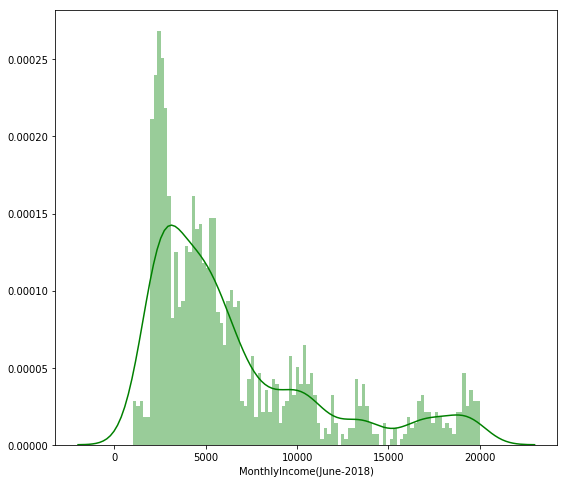

In [36]:
plt.figure(figsize=(9, 8))
sns.distplot(df['MonthlyIncome(June-2018)'], color='g', bins=100, hist_kws={'alpha': 0.4});

<p>In the plotted graph, the monthly income for June-2018 are skewed depending upon the sample</p>

<b>Distribution of all columns in this dataset</b>

In [37]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

<b>Considering only the numeric values for plotting</b>

In [38]:
df_num = df.select_dtypes(include = ['int64'])
df_num.head()

,Employee Number,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
0,1,8,1,3,6,5993,5893
1,5,8,3,3,8,5130,4000
2,10,12,2,4,1,2090,3050
3,15,10,3,3,9,2909,5909
4,20,10,3,2,10,3468,2468


<p>Let us plot the values using Histogram</p>

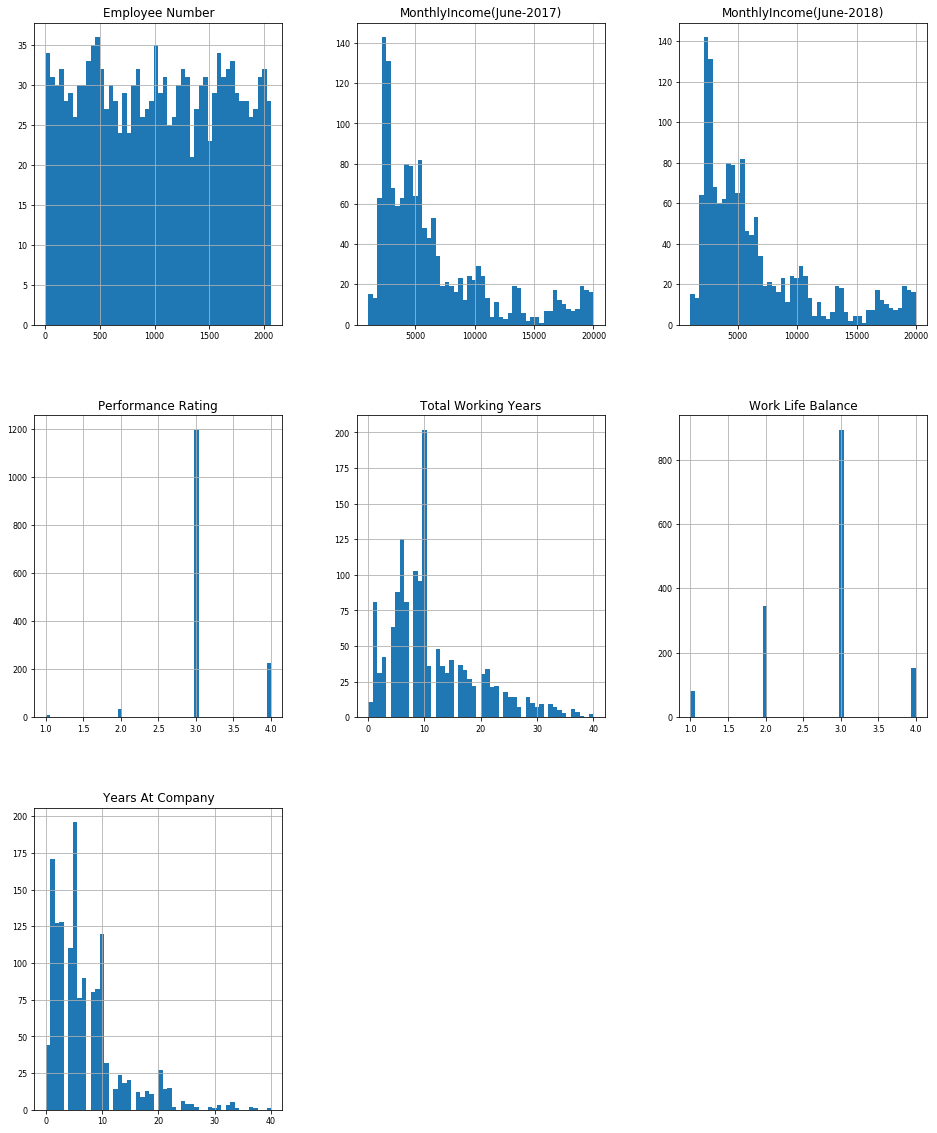

In [39]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

<p>Monthly Income for June-2017 and 2018 have the similar distribution, whereas there is some similarity of distribution between Performance Rating and Work Life Balance features, rest have distinct distributions.</p>

<h3 id="f2f">Feature to Feature relationship</h3>

<p>In this we will try to figure out the relationship between different variables of the dataset</p>

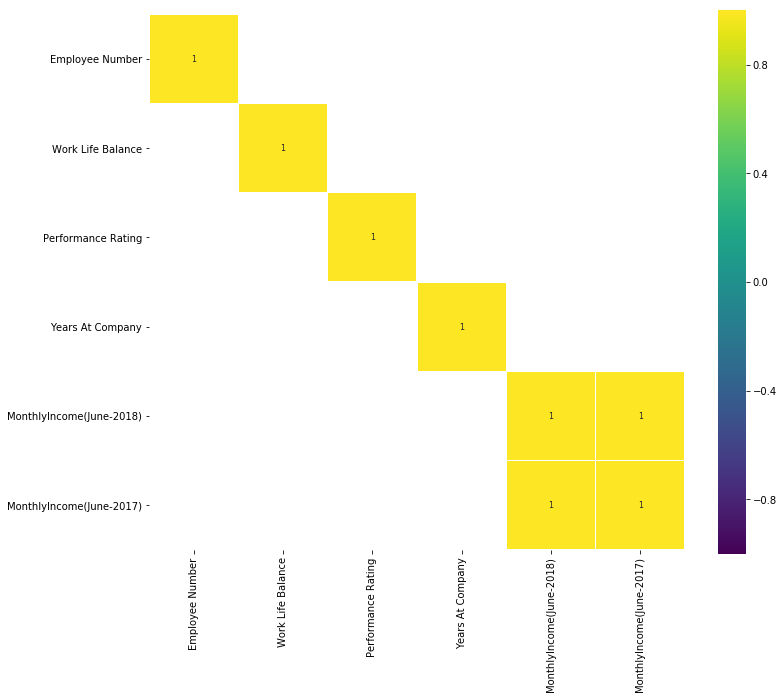

In [40]:
corr = df_num.drop('Total Working Years', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

<h3 id="corr">Correlation</h3>

<p>Showing correlation between Performance Rating and different features in the dataset</p>

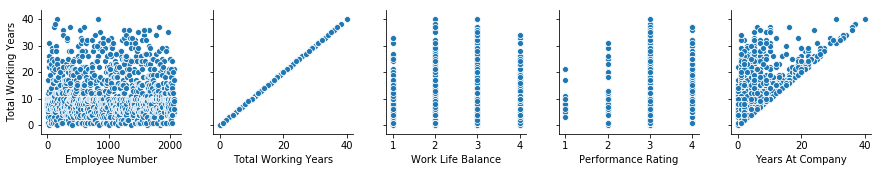

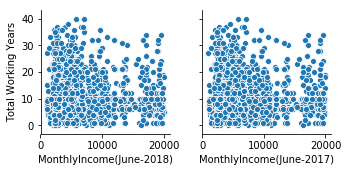

In [41]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['Total Working Years'])

<h3 id="q2q">Quantitative to Quantitative relationship</h3>

<p>Illustrating a relationship between numeric features</p>

In [42]:
quantitative_sections = ["Employee Number", "Total Working Years", "Work Life Balance", "Performance Rating", 
                         "Years At Company", "MonthlyIncome(June-2018)", "MonthlyIncome(June-2017)"]
df_quants = df[quantitative_sections]
df_quants.head()

,Employee Number,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017)
0,1,8,1,3,6,5993,5893
1,5,8,3,3,8,5130,4000
2,10,12,2,4,1,2090,3050
3,15,10,3,3,9,2909,5909
4,20,10,3,2,10,3468,2468


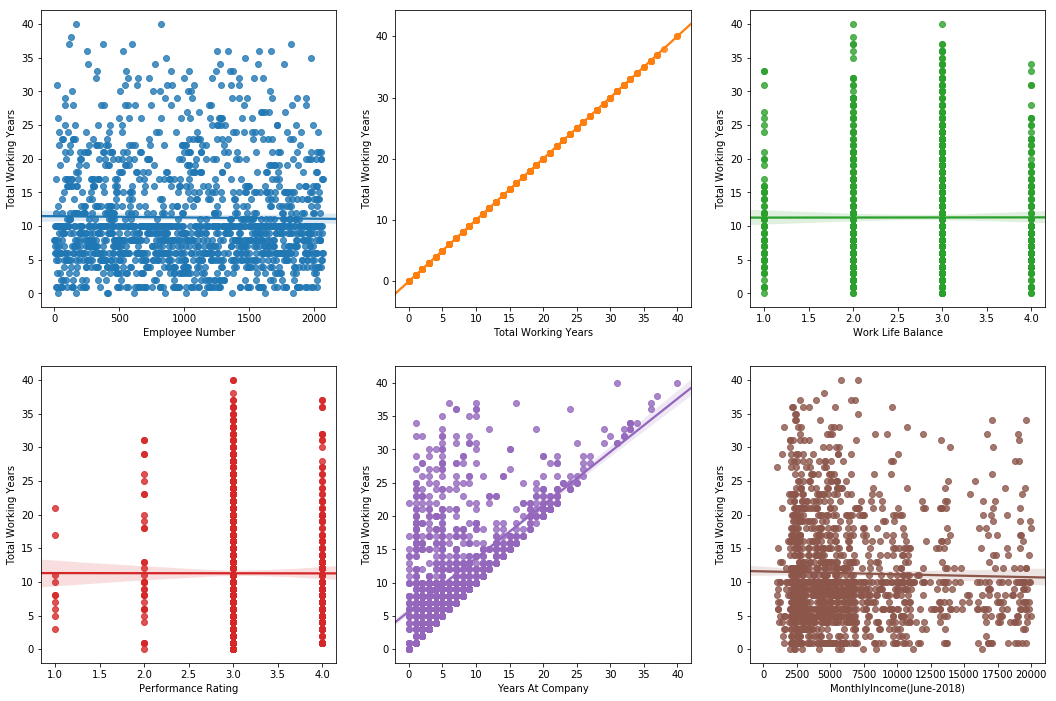

In [43]:
fig, ax = plt.subplots(round(len(quantitative_sections) / 3), 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(quantitative_sections) - 1:
        sns.regplot(x=quantitative_sections[i],y='Total Working Years', data=df[quantitative_sections], ax=ax)

<h3 id="c2q">Categorical to Quantitative relationship</h3>

<p>Illustrating a relationship between numeric and categorical features</p>

In [44]:
df_category = df.select_dtypes(include = ['O'])
df_category.head()

,Gender,Skills
0,Female,Sales
1,Female,Research
2,Female,Content Writing
3,Female,Content Writing
4,Female,Sales


<p>Let's plot some of them</p>

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

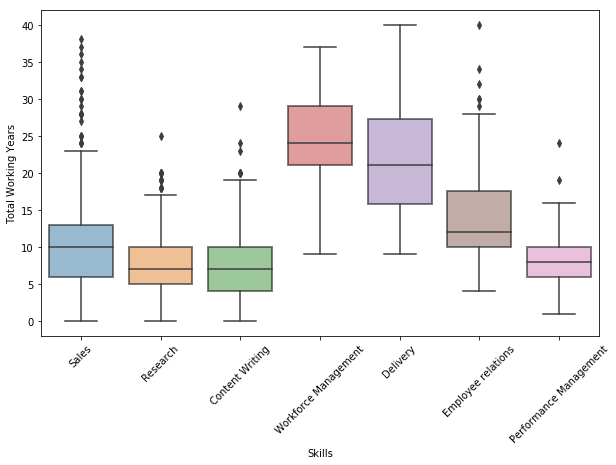

In [45]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Skills', y='Total Working Years', data=df)
plt.setp(ax.artists, alpha=0.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

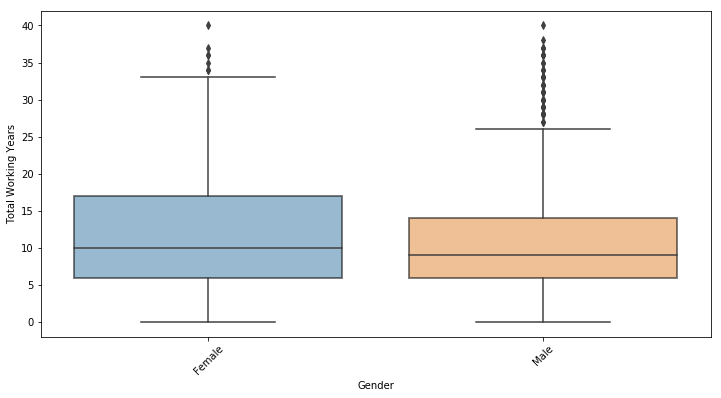

In [46]:
plt.figure(figsize = (12, 6))
ax = sns.boxplot(x='Gender', y='Total Working Years', data=df)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

<p>A clear distinguishment in the gender of employees can be figured out from the boxplot where, the number of male employees
    is more than the female employees.</p>

<p>Their didtribution cam be seen as below</p>

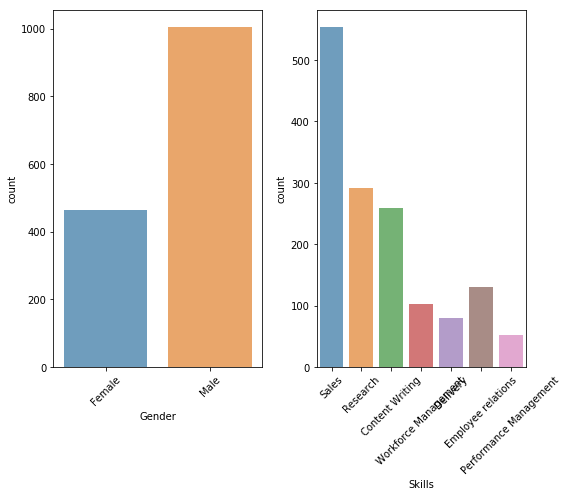

In [49]:
fig, axes = plt.subplots(round(len(df_category.columns) / 3), 2, figsize=(8, 7))

for i, ax in enumerate(fig.axes):
    if i < len(df_category.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_category.columns[i], alpha=0.7, data=df_category, ax=ax)

fig.tight_layout()


 <h3 id="uni">Univariate Analysis</h3>
 <p>Individual variables are analysed in isolation to have a better understanding about them. Pandas provide a describe function to create summary statistics in tabular format for all variables. These ststistics are very useful for numerical types of variables to understand any quality issues such as missing values  and the presence of outliers.<br><br>
    <b>Plots that can be used for Univariate analysis -</b></p>
 <h4 id="bar">1. Bar charts</h4>
 <p>Good for nominal and small ordinal categorical data. Bar charts are arguably the simplest data visualization. They map categories to numbers: the amount of eggs consumed for breakfast (a category) to a number breakfast-eating Americans, for example; or, in our case, wine-producing provinces of the world (category) to the number of labels of wines they produce (number).</p>
 <p><b>Bar chart for showing Total years an employee has worked.</b></p>

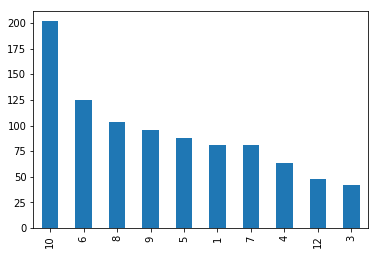

In [50]:
df['Total Working Years'].value_counts().head(10).plot.bar()

<p><b>Bar chart to show the number of years an employee has worked in some other company.</b></p>

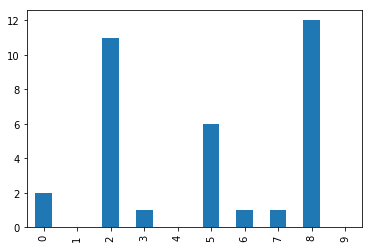

In [51]:
df['difference'] = df['Total Working Years']-df['Years At Company']
df['difference'].head(10)
df['difference'].head(10).plot.bar()

<h4 id="line">2. Line charts</h4>

<p>Line chart to show the count of different skills in the dataset.</p>

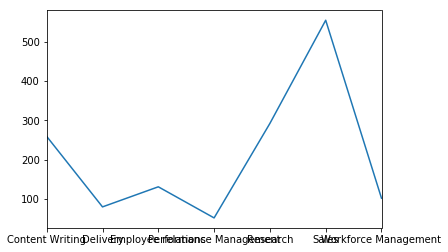

In [52]:
df['Skills'].value_counts().sort_index().plot.line()

<h4 id="area">3. Area charts</h4>

<p>Area charts are just line charts, but with the bottom shaded in.</p>

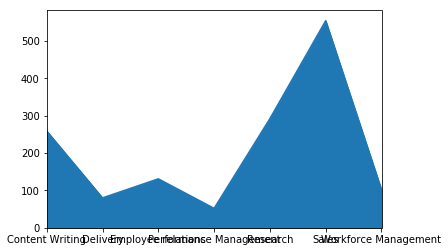

In [53]:
df['Skills'].value_counts().sort_index().plot.area()

<h4 id="hist">4. Histogram</h4>

<p>A Histogram is special kind of bar plot that splits your data into even intervals and displays how many rows are in each interval with bars.</p>

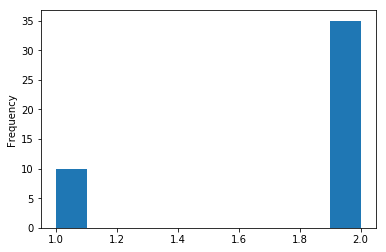

In [54]:
df[df['Performance Rating'] < 3]['Performance Rating'].plot.hist()

 <h3 id="bi">Bivariate Analysis</h3>
 <p>It is performed to understand interactions between different fields in the dataset or finding interactions between variables more than 2.This type of data involves two different variables. The analysis of this type of data deals with causes and relationships and the analysis is done to find out the relationship among the two variables. Suppose that the heights of seven students of a class is recorded, there is only one variable that is height and it is not dealing with any cause or relationship. The description of patterns found in this type of data can be made by drawing conclusions using central tendency measures (mean, median and mode), dispersion or spread of data (range, minimum, maximum, quartiles, variance and standard deviation) and by using <b>frequency distribution tables, histograms, pie charts, frequency polygon and bar charts.</b><br><br>
    <b>Plots that can be used for Bivariate analysis -</b></p>
 <h4 id="scatter">1. Scatter plot</h4>
 <p>Good for interval and some nominal categorical data. The simplest bivariate plot is the lowly scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space.</p>
 <p><b>Scatter plot for showing a relation between Total working years and Years at current company of an employee.</b></p>

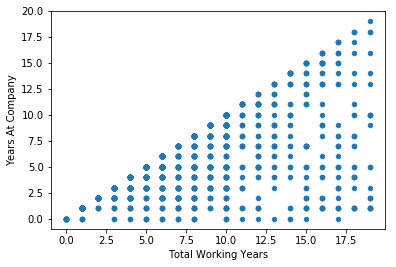

In [55]:
df[df['Total Working Years']<20].plot.scatter(x='Total Working Years', y='Years At Company')

<h4 id="hex">2. Hex plot</h4>
 <p>Good for interval and some nominal categorical data. A hex plot aggregates points in space into hexagons, and then colors those hexagons based on the values within them.</p>
 <p><b>Hex plot for showing a relation between Total working years and Years at current company of an employee.</b></p>

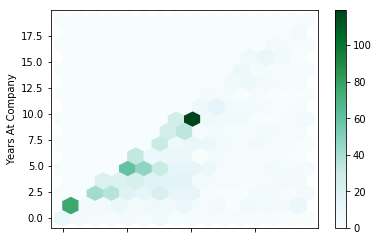

In [56]:
df[df['Total Working Years']<20].plot.hexbin(x='Total Working Years', y='Years At Company', gridsize=15)

<h4 id="stacked">3. Stacked plots</h4>
 <p>Good for nominal and ordinal categorical data. A stacked chart is one which plots the variables one on top of the 
    other.</p>
 <p><b>Stacked plots for showing a relation between employees who have Performance rating greater than 3 and all other features.</b><br>
Trying to illustrate the employees which have Performance rating greater than average.</p>

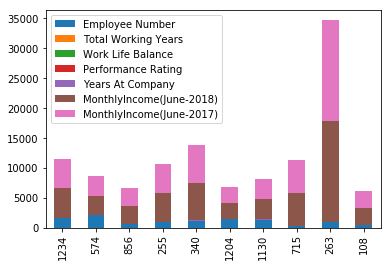

In [13]:
condition = df['Performance Rating']>3
df[condition]
df[condition].sample(10).plot.bar(stacked=True)

<p><b>Stacked area plot</b> is just a resemblance of stacked bar plot with shaded covered area.</p>

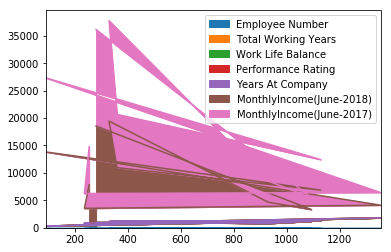

In [17]:
df[condition].sample(10).plot.area()

<h4 id="biv">Bivariate line charts</h4>
<p>Good for ordinal categorical and interval data. One plot type we've seen already that remains highly effective when made bivariate is the line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.</p>

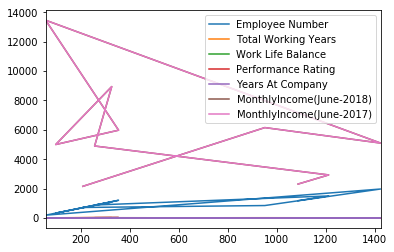

In [18]:
df[condition].sample(10).plot.line()

 <h3 id="multi">Multivariate Analysis</h3>
 <p>When the data involves three or more variables, it is categorized under multivariate. Example of this type of data is suppose an advertiser wants to compare the popularity of four advertisements on a website, then their click rates could be measured for both men and women and relationships between variables can then be examined.<br>
It is similar to bivariate but contains more than one dependent variable. The ways to perform analysis on this data depends on the goals to be achieved.Some of the techniques are regression analysis,path analysis,factor analysis and multivariate analysis of variance (MANOVA).<br><br>
    <b>Plots that can be used for Multivariate analysis -</b></p>
 <h4 id="multi">1. Multivariate Scatter plot</h4>
 

In [5]:
emp = df.copy()
emp['sorted_pr'] = df['Performance Rating'] > 3
emp['sorted_twy'] = df['Total Working Years'] > 10
emp['sorted_mi'] = df['MonthlyIncome(June-2018)']>3000
df['filtered'] = np.where(emp['sorted_pr'], emp['sorted_twy'], emp['sorted_mi'])
emp = emp.assign(sorted_emp=df['filtered'],
                                 abb_skills=df['Skills'])
emp.head()

,Gender,Employee Number,Skills,Total Working Years,Work Life Balance,Performance Rating,Years At Company,MonthlyIncome(June-2018),MonthlyIncome(June-2017),sorted_pr,sorted_twy,sorted_mi,sorted_emp,abb_skills
0,Female,1,Sales,8,1,3,6,5993,5893,False,False,True,True,Sales
1,Female,5,Research,8,3,3,8,5130,4000,False,False,True,True,Research
2,Female,10,Content Writing,12,2,4,1,2090,3050,True,True,False,True,Content Writing
3,Female,15,Content Writing,10,3,3,9,2909,5909,False,False,False,False,Content Writing
4,Female,20,Sales,10,3,2,10,3468,2468,False,False,True,True,Sales


In [31]:
df['Skills'].unique()

array(['Sales', 'Research', 'Content Writing', 'Workforce Management',
       'Delivery', 'Employee relations', 'Performance Management'],
      dtype=object)

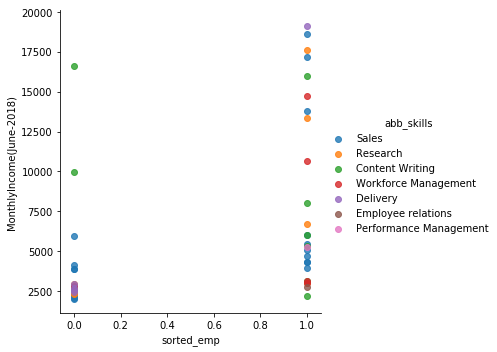

In [48]:
sns.lmplot(x='sorted_emp', y='MonthlyIncome(June-2018)', hue='abb_skills', 
           data=emp.sample(50).loc[emp['abb_skills'].isin(['Sales', 'Research', 'Content Writing', 'Workforce Management',
       'Delivery', 'Employee relations', 'Performance Management'])], 
           fit_reg=False)

<h4 id="gbox">2. Grouped Box plot</h4>
<p>Another demonstrative plot is the grouped box plot. This plot takes advantage of grouping.</p>

In [7]:
# e = (emp
#          .loc[emp['Skills'].isin(['ST', 'GK'])]
#          .loc[:, ['sorted_emp', 'MonthlyIncome(June-2018)', 'Total Working Years', 'abb_skills']]
#     )
# e = e[e["MonthlyIncome(June-2018)"] > 3000]
# e = e[e["MonthlyIncome(June-2018)"] < 10000]
# e['Total Working Years'] = e['Total Working Years'].astype(float)

# sns.boxplot(x="sorted_emp", y="MonthlyIncome(June-2018)", hue="abb_skills", data=e)

<h4 id="map">3. Heatmap</h4>
<p>Probably the most heavily used summarization visualization is the correlation plot, in which measures the correlation between every pair of values in a dataset and plots a result in color.</p>

<h4 id="parallel">4. Parallel Coordinates</h4>
<p>A parallel coordinates plot provides another way of visualizing data across many variables. Parallel coordinates plots are great for determining how distinguishable different classes are in the data. They standardize the variables from top to bottom.</p>

In [8]:
# from pandas.plotting import parallel_coordinates

# e = (
#     emp.iloc[:, 5:10]
#         .loc[emp['abb_skills'].isin(['Sales', 'Research', 'Content Writing'])]
#         .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
#         .dropna()
# )
# e['abb_skills'] = emp['abb_skills']
# e = e.sample(100)

# parallel_coordinates(e, 'abb_skills')